# **TUGAS AKHIR - SANBERCODE DS 28**

> Nama: Muhammad Nur Arifin

> Batch : Data Science Batch **28**


#### **Objective**
Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.

#### **Permasalahan**
HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.


#### **Atribut**
* Negara : Nama negara
* Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
* Ekspor : Ekspor barang dan jasa perkapita
* Kesehatan: Total pengeluaran kesehatan perkapita
* Impor: Impor barang dan jasa perkapita
* Pendapatan: Penghasilan bersih perorang
* Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
* Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
* Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
* GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 




## **IMPORT LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans 

## **READING & UNDERSTANDING DATA**

In [3]:
df = pd.read_csv('/content/Data_Negara_HELP.csv')

In [4]:
# Menampilkan cuplikan dataset
display(df.head())
display(df.info())
print('\n')
print('Berikut shape dari dataset -> ', df.shape)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


None



Berikut shape dari dataset ->  (167, 10)


In [5]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# Mendeteksi missing value
print(df.isnull().sum())
display(df.shape)

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64


(167, 10)

In [7]:
df['Negara'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
162    False
163    False
164    False
165    False
166    False
Name: Negara, Length: 167, dtype: bool

## **EXPLORATORY DATA ANALYSIS**

#### **A. Univariate**

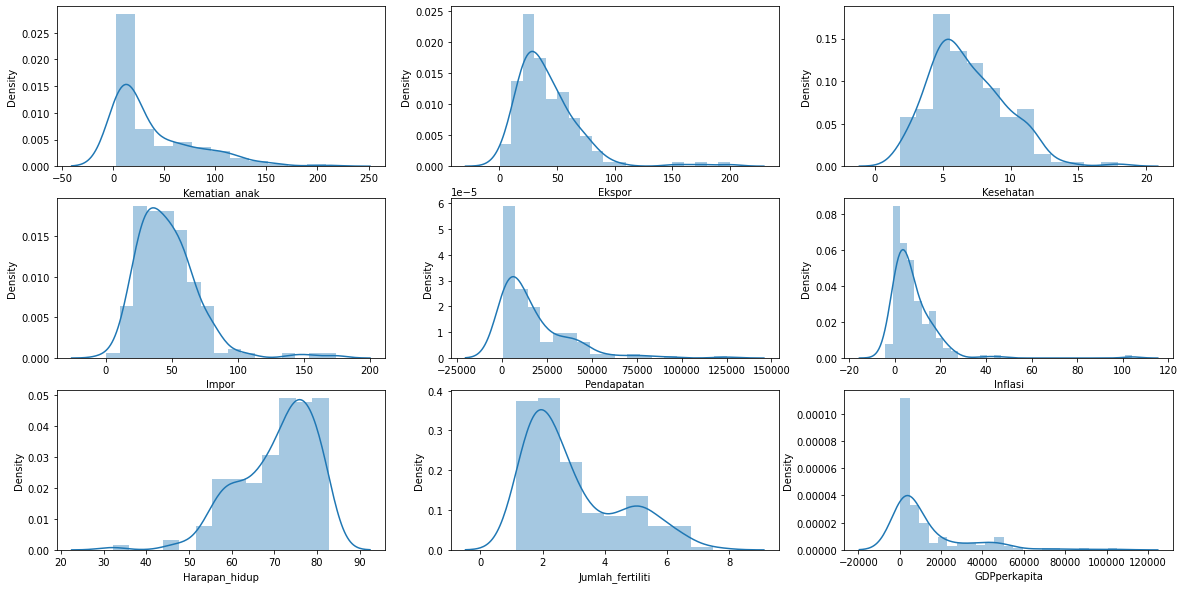

In [8]:
plt.figure(figsize=(20,10))

for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(df[i[1]])
plt.show()

#### **B. Bivariate**

In [9]:
health = df.sort_values('Kesehatan', ascending=False)
health

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
159,United States,7.3,12.400,17.90,15.8000,49400,1.220,78.7,1.93,48400
101,"Micronesia, Fed. Sts.",40.0,23.500,14.20,81.0000,3340,3.800,65.4,3.46,2860
132,Sierra Leone,160.0,16.800,13.10,34.5000,1220,17.200,55.0,5.20,399
110,Netherlands,4.5,72.000,11.90,63.6000,45500,0.848,80.7,1.79,50300
54,France,4.2,26.800,11.90,28.1000,36900,1.050,81.4,2.03,40600
...,...,...,...,...,...,...,...,...,...,...
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.310,67.9,2.83,4440
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.700,60.4,4.95,2740
116,Pakistan,92.1,13.500,2.20,19.4000,4280,10.900,65.3,3.85,1040
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.040,66.8,2.41,988


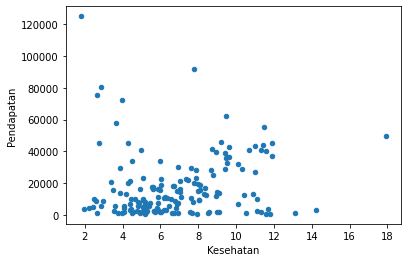

In [10]:
df[df['Kesehatan'] < 100].plot.scatter(x='Kesehatan', y='Pendapatan')

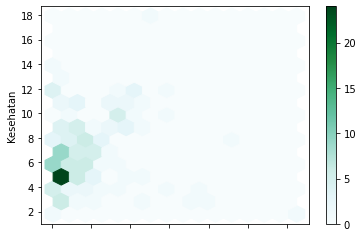

In [11]:
df.plot.hexbin(x='Pendapatan', y='Kesehatan', gridsize=15)

#### **C. Multivariate**

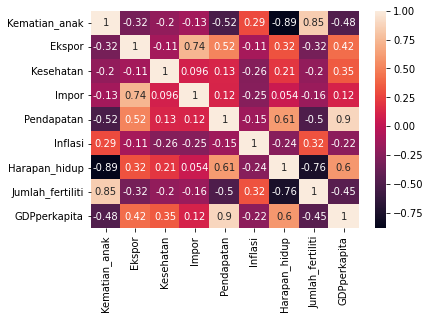

In [12]:
sns.heatmap(df.corr(), annot=True, fmt='.2g');

## **OUTLIER TREATMENT**

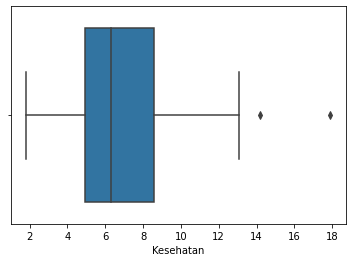

In [13]:
sns.boxplot('Kesehatan', data=df)

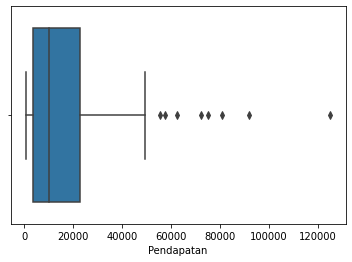

In [14]:
sns.boxplot('Pendapatan', data=df)

In [15]:
def finding_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_final

print(finding_outlier(df['Kesehatan']))
print(finding_outlier(df['Pendapatan']))

101    14.2
159    17.9
Name: Kesehatan, dtype: float64
23      80600
82      75200
91      91700
114     62300
123    125000
133     72100
145     55500
157     57600
Name: Pendapatan, dtype: int64


In [16]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
  return df_final

df2 = remove_outlier(df[['Kesehatan', 'Pendapatan']])

df2.dropna(axis=0, inplace=True)
df2

,Kesehatan,Pendapatan
0,7.58,1610.0
1,6.55,9930.0
2,4.17,12900.0
3,2.85,5900.0
4,6.03,19100.0
...,...,...
162,5.25,2950.0
163,4.91,16500.0
164,6.84,4490.0
165,5.18,4480.0


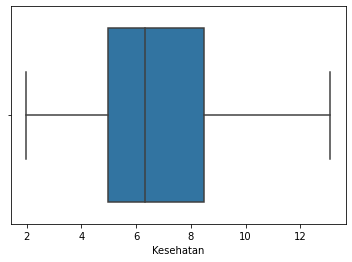

In [17]:
sns.boxplot('Kesehatan', data=df2);

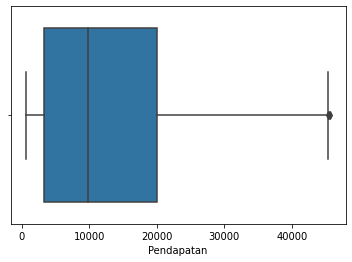

In [18]:
sns.boxplot('Pendapatan', data=df2);

In [19]:
df2['Kesehatan'].unique()

array([ 7.58,  6.55,  4.17,  2.85,  6.03,  8.1 ,  4.4 ,  8.73, 11.  ,
        5.88,  7.89,  4.97,  3.52,  7.97,  5.61, 10.7 ,  5.2 ,  4.1 ,
        4.84, 11.1 ,  8.3 ,  9.01,  6.87,  6.74, 11.6 ,  5.68,  5.13,
       11.3 ,  4.09,  3.98,  4.53,  7.96,  5.07,  7.59,  4.51,  7.91,
        2.46, 10.9 ,  5.3 ,  7.76,  5.97,  7.88, 11.4 ,  6.22,  8.06,
        4.66,  6.91,  4.48,  2.66,  4.86,  8.95, 11.9 ,  3.5 ,  5.69,
       10.1 ,  5.22, 10.3 ,  5.86,  6.85,  4.93,  8.5 ,  5.38,  7.33,
        9.4 ,  4.05,  2.61,  5.6 ,  8.41,  9.19,  7.63,  9.53,  4.81,
        9.49,  8.04,  4.29,  4.75,  6.18,  4.47,  6.68,  7.03, 11.8 ,
        3.88,  7.04,  7.09,  3.77,  6.59,  4.39,  6.33,  4.98,  8.65,
        4.41,  6.  , 11.7 ,  5.44,  9.11,  5.21,  1.97,  6.78,  5.25,
        5.16,  2.77,  2.2 ,  5.87,  5.08,  3.61,  7.46,  5.58, 10.5 ,
        6.47,  5.66, 10.4 ,  3.4 , 13.1 ,  8.79,  9.41,  8.55,  8.94,
        6.93,  9.54,  2.94,  6.32,  7.01,  9.63,  5.98,  6.01,  9.12,
        7.65,  6.21,

## **SCALING DATA**

In [20]:
#feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df2)

## **CREATING K MEANS CLUSTERING & VISUALIZING CLUSTERS FORMED**

In [21]:
#clustering with KMeans

from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [22]:
new_df = pd.DataFrame(data=df_std, columns=['Kesehatan', 'Pendapatan'])
new_df['label1_kmeans'] = labels1
new_df

,Kesehatan,Pendapatan,label1_kmeans
0,0.327239,-0.957093,1
1,-0.087510,-0.311883,1
2,-1.045863,-0.081562,1
3,-1.577386,-0.624407,1
4,-0.296898,0.399244,1
...,...,...,...
152,-0.610980,-0.853177,1
153,-0.747888,0.197616,1
154,0.029264,-0.733751,1
155,-0.639167,-0.734527,1


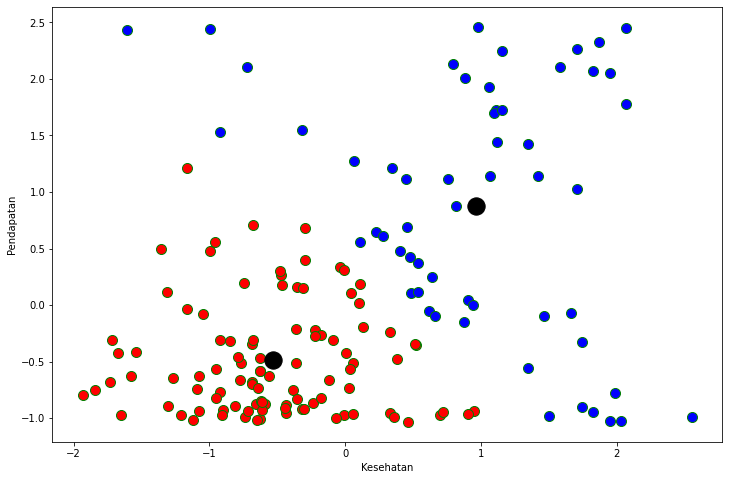

In [23]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Kesehatan'][new_df.label1_kmeans==0], new_df['Pendapatan'][new_df.label1_kmeans==0], c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Kesehatan'][new_df.label1_kmeans==1], new_df['Pendapatan'][new_df.label1_kmeans==1], c='red', s=100, edgecolors='green')

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], c='k', s=300)
plt.xlabel('Kesehatan')
plt.ylabel('Pendapatan')
plt.show()

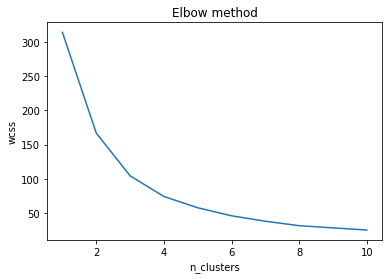

In [24]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

In [25]:
kmeans2 = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeans2.fit(df_std)
labels2 = kmeans2.labels_


In [26]:
new_df['label2_kmeans'] = labels2
new_df

,Kesehatan,Pendapatan,label1_kmeans,label2_kmeans
0,0.327239,-0.957093,1,2
1,-0.087510,-0.311883,1,1
2,-1.045863,-0.081562,1,1
3,-1.577386,-0.624407,1,1
4,-0.296898,0.399244,1,0
...,...,...,...,...
152,-0.610980,-0.853177,1,1
153,-0.747888,0.197616,1,0
154,0.029264,-0.733751,1,1
155,-0.639167,-0.734527,1,1


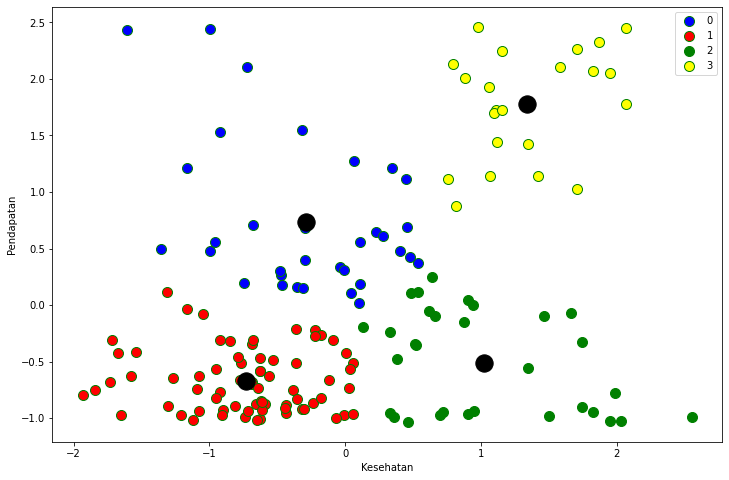

In [39]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['Kesehatan'][new_df.label2_kmeans==0], new_df['Pendapatan'][new_df.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df['Kesehatan'][new_df.label2_kmeans==1], new_df['Pendapatan'][new_df.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df['Kesehatan'][new_df.label2_kmeans==2], new_df['Pendapatan'][new_df.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')
plt.scatter(new_df['Kesehatan'][new_df.label2_kmeans==3], new_df['Pendapatan'][new_df.label2_kmeans==3], label='3', c='yellow', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.xlabel('Kesehatan')
plt.ylabel('Pendapatan')
plt.legend()
plt.show()

In [40]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels= labels1))
print(silhouette_score(df_std, labels= labels2))

0.45672849084282163
0.4544762214325836


Inverse Transform

In [29]:
from sklearn.cluster import KMeans
kmeansa = KMeans(n_clusters = 2, random_state=42)
kmeansa.fit(sc.inverse_transform(df_std))
labelsa = kmeansa.labels_
labelsa

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

In [30]:
kmeansb = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeansb = kmeansb.fit(df_std)
labelsb = kmeansb.labels_
labelsb

array([2, 1, 1, 1, 0, 0, 1, 3, 3, 0, 0, 0, 1, 2, 0, 3, 1, 1, 1, 1, 2, 2,
       2, 0, 1, 2, 1, 1, 3, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 3,
       1, 2, 1, 1, 0, 1, 0, 1, 3, 3, 1, 1, 2, 3, 1, 3, 1, 1, 1, 2, 1, 1,
       0, 3, 1, 1, 0, 2, 3, 0, 3, 1, 3, 2, 0, 1, 2, 1, 1, 0, 0, 2, 2, 0,
       0, 2, 1, 1, 0, 1, 1, 3, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 3, 3, 1, 1,
       0, 1, 2, 1, 1, 1, 0, 3, 0, 0, 2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 0,
       3, 1, 1, 1, 0, 3, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 3, 2, 1, 1, 0,
       1, 1, 1], dtype=int32)

In [41]:
new_df1 = pd.DataFrame(data=sc.inverse_transform(df_std), columns=['Kesehatan', 'Pendapatan'])
new_df1['label1_kmeans'] = labelsa
new_df1['label2_kmeans'] = labelsb
new_df1

,Kesehatan,Pendapatan,label1_kmeans,label2_kmeans
0,7.58,1610.0,0,2
1,6.55,9930.0,0,1
2,4.17,12900.0,0,1
3,2.85,5900.0,0,1
4,6.03,19100.0,0,0
...,...,...,...,...
152,5.25,2950.0,0,1
153,4.91,16500.0,0,0
154,6.84,4490.0,0,1
155,5.18,4480.0,0,1


No handles with labels found to put in legend.


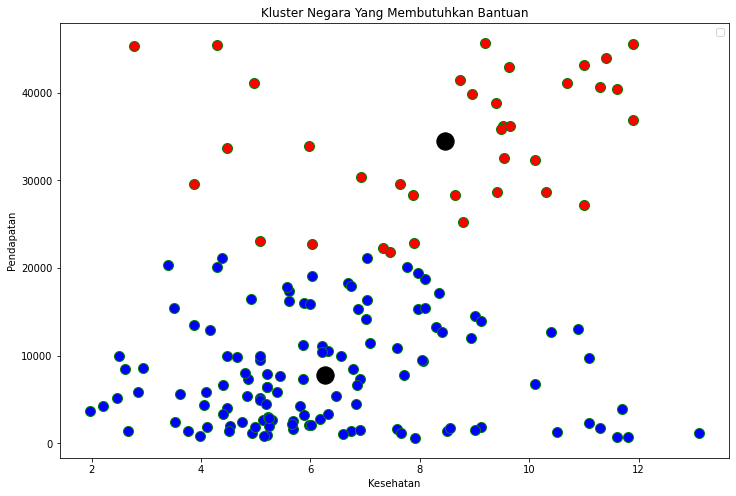

In [42]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['Kesehatan'][new_df1.label1_kmeans == 0], new_df1['Pendapatan'][new_df1.label1_kmeans == 0], c='blue', s=100, edgecolor='green')
plt.scatter(new_df1['Kesehatan'][new_df1.label1_kmeans == 1], new_df1['Pendapatan'][new_df1.label1_kmeans == 1], c='red', s=100, edgecolor='green')

plt.scatter(kmeansa.cluster_centers_[:, 0],kmeansa.cluster_centers_[:, 1], c='k', s=300 )
plt.legend()
plt.title('Kluster Negara Yang Membutuhkan Bantuan')
plt.xlabel('Kesehatan')
plt.ylabel('Pendapatan')
plt.show()

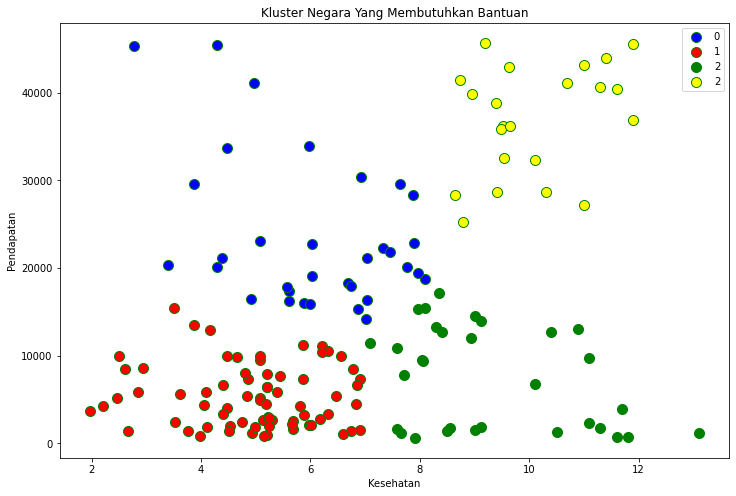

In [33]:
plt.figure(figsize=(12,8))

plt.scatter(new_df1['Kesehatan'][new_df1.label2_kmeans == 0], new_df1['Pendapatan'][new_df1.label2_kmeans == 0], c='blue', label='0', s=100, edgecolor='green')
plt.scatter(new_df1['Kesehatan'][new_df1.label2_kmeans == 1], new_df1['Pendapatan'][new_df1.label2_kmeans == 1], c='red', label='1', s=100, edgecolor='green')
plt.scatter(new_df1['Kesehatan'][new_df1.label2_kmeans == 2], new_df1['Pendapatan'][new_df1.label2_kmeans == 2], c='green',label = '2', s=100, edgecolor='green')
plt.scatter(new_df1['Kesehatan'][new_df1.label2_kmeans == 3], new_df1['Pendapatan'][new_df1.label2_kmeans == 3], c='yellow',label = '2', s=100, edgecolor='green')

# plt.scatter(kmeansb.cluster_centers_[:, 0],kmeansb.cluster_centers_[:, 1], c='k', s=300 )
plt.legend()
plt.title('Kluster Negara Yang Membutuhkan Bantuan')
plt.xlabel('Kesehatan')
plt.ylabel('Pendapatan')
plt.show()

##**REPORT COUNTRIES**

In [43]:
#summary to main data
df3 = pd.merge(df,new_df1, how='outer')

df3['label2_kmeans'] = df3['label2_kmeans'].astype('object')
df3

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0.0,2
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0.0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0.0,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,NaN,NaN
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,NaN,NaN,NaN,5.21,NaN,918.0,NaN,NaN,NaN,NaN,0.0,1
176,NaN,NaN,NaN,1.97,NaN,3720.0,NaN,NaN,NaN,NaN,0.0,1
177,NaN,NaN,NaN,2.77,NaN,45300.0,NaN,NaN,NaN,NaN,1.0,0
178,NaN,NaN,NaN,5.87,NaN,7290.0,NaN,NaN,NaN,NaN,0.0,1


In [44]:
kesehatan_rendah = df3[df3['label2_kmeans']==1]
kesehatan_rendah

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.490,76.3,1.65,4090.0,0.0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.100,76.5,2.89,4460.0,0.0,1
16,Belize,18.8,58.2,5.20,57.5,7880.0,1.140,71.4,2.71,4340.0,0.0,1
17,Benin,111.0,23.8,4.10,37.2,1820.0,0.885,61.8,5.36,758.0,0.0,1
18,Bhutan,42.7,42.5,5.20,70.7,6420.0,5.990,72.1,2.38,2180.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
174,NaN,NaN,NaN,5.20,NaN,6440.0,NaN,NaN,NaN,NaN,0.0,1
175,NaN,NaN,NaN,5.21,NaN,918.0,NaN,NaN,NaN,NaN,0.0,1
176,NaN,NaN,NaN,1.97,NaN,3720.0,NaN,NaN,NaN,NaN,0.0,1
178,NaN,NaN,NaN,5.87,NaN,7290.0,NaN,NaN,NaN,NaN,0.0,1


In [45]:
candidate = kesehatan_rendah.sort_values(by=['Kesehatan'],ascending=True)[:10]
display(candidate)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
176,NaN,NaN,NaN,1.97,NaN,3720.0,NaN,NaN,NaN,NaN,0.0,1
116,Pakistan,92.1,13.50,2.20,19.4,4280.0,10.90,65.3,3.85,1040.0,0.0,1
38,"Congo, Rep.",63.9,85.10,2.46,54.7,5190.0,20.70,60.4,4.95,2740.0,0.0,1
154,Turkmenistan,62.0,76.30,2.50,44.5,9940.0,2.31,67.9,2.83,4440.0,0.0,1
172,NaN,NaN,NaN,2.61,NaN,8430.0,NaN,NaN,NaN,NaN,0.0,1
50,Eritrea,55.2,4.79,2.66,23.3,1420.0,11.60,61.7,4.61,482.0,0.0,1
167,NaN,NaN,NaN,2.85,NaN,5900.0,NaN,NaN,NaN,NaN,0.0,1
140,Sri Lanka,11.2,19.60,2.94,26.8,8560.0,22.80,74.4,2.20,2810.0,0.0,1
55,Gabon,63.7,57.70,3.50,18.9,15400.0,16.60,62.9,4.08,8750.0,0.0,1
169,NaN,NaN,NaN,3.52,NaN,2440.0,NaN,NaN,NaN,NaN,0.0,1


In [46]:
px.bar(candidate, x='Negara', y='Kematian_anak', title='Urutan Negara Yang Kesehatannya Rendah Berdasarkan Tingkat Kematian')

In [47]:
px.bar(candidate, x='Negara', y='GDPperkapita', title='Urutan Negara Yang Kesehatannya Rendah Berdasarkan GDP Perkapita')